# Insect Classification Using Artificial Neural Networks

#### Dataset

bees => 500  
ants => 499  
grasshopper =>  485  
weevil =>  485  
beetle  => 416  

In [163]:
from PIL import Image
import numpy as np
import pandas as pd
import csv
import os
from skimage.feature import graycomatrix, graycoprops

# ANN

### Step 1: Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

2023-07-26 11:09:44.899688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2: Load and preprocess the data

Assuming you have your dataset in a CSV file with features in columns and the target class in a separate column, you can load the data using pandas and preprocess it.

In [169]:
# Load the dataset
df_insects = pd.read_csv("csvs/insect_features.csv")

In [170]:
df_insects.head()

,image,red_sum,green_sum,blue_sum,correlation,energy,contrast,homogeneity,label
0,[[[ 80 82 9]\n [ 81 83 10]\n [ 81 82 ...,9134131,8256610,4715470,0.972194,0.038341,96.018834,0.443125,bees
1,[[[ 22 25 18]\n [ 23 26 15]\n [ 23 30 ...,5907834,6628826,4470176,0.959385,0.016422,301.308391,0.217472,bees
2,[[[142 139 134]\n [142 139 134]\n [142 139 1...,8550705,7956229,6818357,0.989593,0.051622,46.378827,0.602251,bees
3,[[[ 83 121 44]\n [ 84 122 45]\n [ 84 122 ...,8040646,8262897,3439173,0.980975,0.120290,27.782676,0.693050,bees
4,[[[109 85 47]\n [111 85 48]\n [112 86 ...,6468017,5614122,3780216,0.991475,0.058728,44.074435,0.553815,bees


##### 2.1 Preprocessing of data

In [171]:
df_insects['red_sum'] = pd.to_numeric(df_insects['red_sum'], errors='coerce')
df_insects['green_sum'] = pd.to_numeric(df_insects['green_sum'], errors='coerce')
df_insects['blue_sum'] = pd.to_numeric(df_insects['blue_sum'], errors='coerce')
df_insects['correlation'] = pd.to_numeric(df_insects['correlation'], errors='coerce')
df_insects['energy'] = pd.to_numeric(df_insects['energy'], errors='coerce')
df_insects['contrast'] = pd.to_numeric(df_insects['contrast'], errors='coerce')
df_insects['homogeneity'] = pd.to_numeric(df_insects['homogeneity'], errors='coerce')

In [172]:
df_insects['label'].value_counts()

label
bees           500
ants           499
grasshopper    485
weevil         485
beetle         416
Name: count, dtype: int64

In [173]:
# Separate features and target variable
X = df_insects.drop(['label','image'], axis=1)
y = df_insects['label']

# Encode the target variable to numerical values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

Step 3: Split the data into training and testing sets

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_encoded, test_size=0.2, random_state=42)

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
num_clases = 5

Step 4: Build the Neural Network model

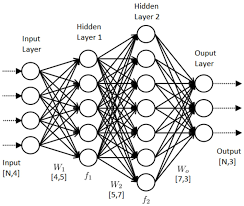

In [177]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_clases, activation='softmax'))  # 5 units for 5 classe

In [178]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                512       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3205 (12.52 KB)
Trainable params: 3205 (12.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 5: Compile the model

In [179]:
model.compile(
        optimizer='SGD', 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])

Step 6: Train the model

In [180]:
history = model.fit(X_train, y_train, epochs=500, 
                    batch_size=16, validation_split=0.1)

Epoch 1/500
108/108 [==============================] - 1s 2ms/step - loss: 1.6091 - accuracy: 0.2085 - val_loss: 1.5938 - val_accuracy: 0.2513
Epoch 2/500
108/108 [==============================] - 0s 1ms/step - loss: 1.5993 - accuracy: 0.2394 - val_loss: 1.5906 - val_accuracy: 0.2408
Epoch 3/500
108/108 [==============================] - 0s 1ms/step - loss: 1.5917 - accuracy: 0.2452 - val_loss: 1.5883 - val_accuracy: 0.2513
Epoch 4/500
108/108 [==============================] - 0s 1ms/step - loss: 1.5844 - accuracy: 0.2679 - val_loss: 1.5857 - val_accuracy: 0.2356
Epoch 5/500
108/108 [==============================] - 0s 1ms/step - loss: 1.5767 - accuracy: 0.2708 - val_loss: 1.5829 - val_accuracy: 0.2199
Epoch 6/500
108/108 [==============================] - 0s 1ms/step - loss: 1.5697 - accuracy: 0.2900 - val_loss: 1.5793 - val_accuracy: 0.2251
Epoch 7/500
108/108 [==============================] - 0s 1ms/step - loss: 1.5628 - accuracy: 0.3075 - val_loss: 1.5759 - val_accuracy: 0.2199

Step 7: Plot the loss and accuracy during training

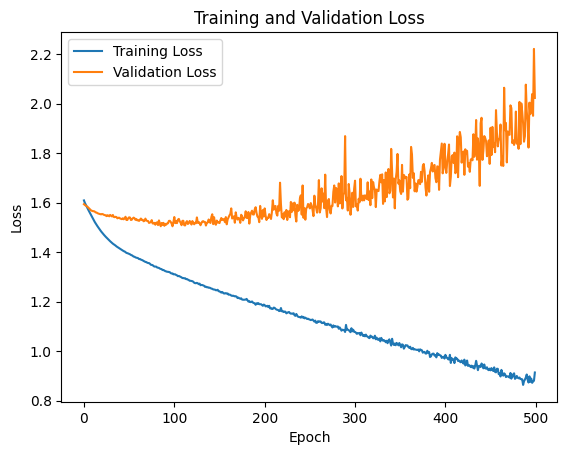

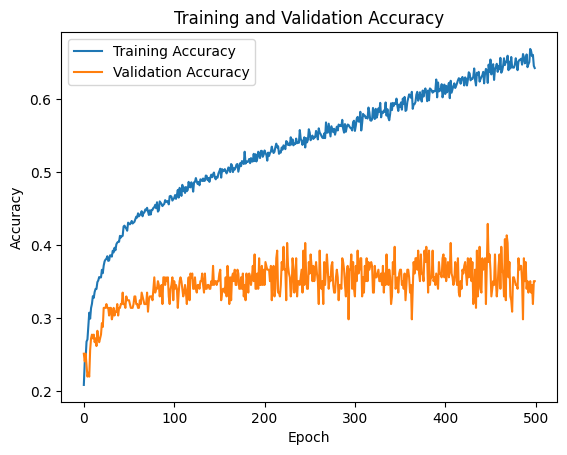

In [181]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


Step 8: Evaluate the model on the test set and plot the confusion matrix

15/15 [==============================] - 0s 769us/step


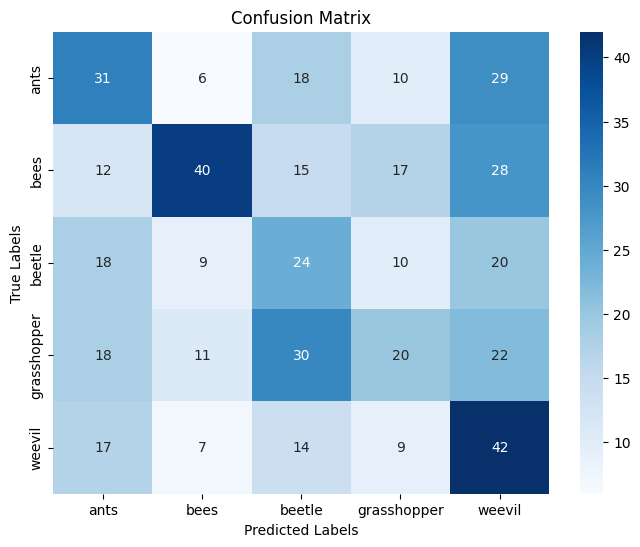

In [182]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Exercises

Based on the above implementation, modify the network architecture for better performance and understanding of the Artificial Neural Network (ANN)

#### Question 1: 

How can we improve the current model's performance by adding more hidden layers? 


By increasing the number of hidden layers, we can potentially capture more complex patterns and relationships in the data. This could lead to better feature representation and higher accuracy in predictions. 

However, adding too many layers might also increase the risk of overfitting, so we need to strike a balance and consider regularization techniques to prevent overfitting.


### Question 2:

Would using a different activation function in the output layer be beneficial for this specific classification problem? 

The current model uses the softmax activation function in the output layer, which is commonly used for multi-class classification tasks. 

However, depending on the nature of the problem and the data distribution, other activation functions like sigmoid or tanh might be more suitable. 

Experimenting with different activation functions can help us identify the one that performs best for this particular problem.

### Question 3:

Is it necessary to apply batch normalization or dropout to improve the model's generalization and prevent overfitting? 


Batch normalization and dropout are regularization techniques commonly used in neural networks to prevent overfitting and improve generalization. 

Considering the model's architecture and complexity, incorporating batch normalization or dropout layers between hidden layers can enhance the model's ability to generalize well on unseen data.

### Question 4: 

Should we consider using a different optimization algorithm, such as Adam or RMSprop, to train the model more efficiently? 


The current model might be using a default optimization algorithm like stochastic gradient descent (SGD). 

However, there are more advanced optimizers, such as Adam and RMSprop, that often converge faster and can potentially improve the overall training efficiency and performance. 

Experimenting with different optimization algorithms can help find the one that works best for this specific problem.